In [93]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import seaborn as sns


In [2]:
finall_brazil_datasets = pd.read_csv('finaldf.csv')
brazil_datasets = pd.read_csv('All_data_plus_zip_code2.csv')

print(finall_brazil_datasets.columns)


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category_name_english',
       'customer_zip_code_prefix', 'seller_zip_code_prefix',
       'seller_geolocation_lat', 'seller_geolocation_lng',
       'customer_geolocation_lat', 'customer_geolocation_lng'],
      dtype='object')


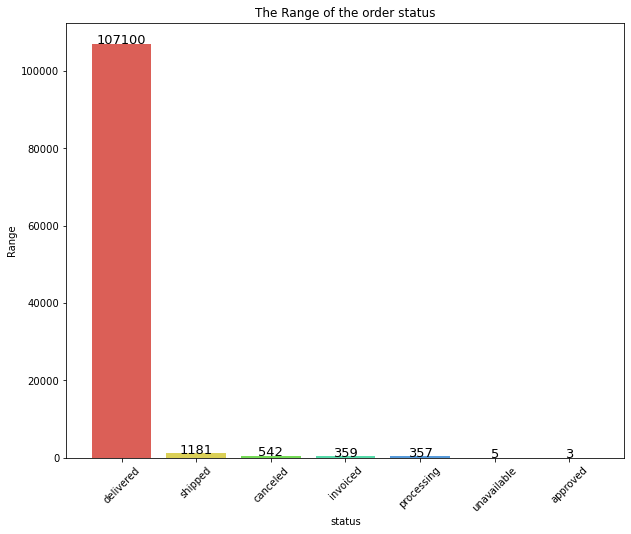

In [3]:
#이전 파일에서 배달상태(shipping, canceled, invoiced, processing)비율이 적다는것을 보여주기 위한 셀
orders_status = brazil_datasets.groupby('order_status').size().sort_values(ascending = False)
orders_status_size = np.arange(len(orders_status))
orders_status_index = [orders_status.index][0]
orders_status_value = [orders_status.values][0]
percentage_orders = np.round((orders_status_value / orders_status_value.sum(axis=0)), 5) * 100

#바 그래프
colors = sns.color_palette('hls', len(orders_status))
plt.figure(figsize=(10,8))
plt.xticks(orders_status_size, labels = orders_status_index, rotation = 45)
bars = plt.bar(orders_status_size, orders_status, color = colors)
for i, b in enumerate(bars):
    plt.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, orders_status_value[i], ha='center', fontsize=13)
plt.title('The Range of the order status')
plt.xlabel('status')
plt.ylabel('Range')
plt.show()


In [4]:
#년 월별 총 배송 수
df = pd.DataFrame({'purchase_date': pd.to_datetime(finall_brazil_datasets['order_purchase_timestamp'])})
df['year'] = df['purchase_date'].dt.year 
df['month'] = df['purchase_date'].dt.month

df_2017 = df[df['year'] == 2017]
df_2017 = df_2017.groupby('month').size()
df_2018 = df[df['year'] == 2018]
df_2018 = df_2018.groupby('month').size()
months = [i for i in range(1,13)]
df_2017 = pd.DataFrame(df_2017)
df_2018 = pd.DataFrame(df_2018)
df_2017.columns = ['cnt']
df_2018.columns = ['cnt']
df_2018.loc[9]=[0]
df_2018.loc[10]=[0]
df_2018.loc[11]=[0]
df_2018.loc[12]=[0]
np.round((orders_status_value / orders_status_value.sum(axis=0)), 5) * 100
df_2017['percent'] = np.round((df_2017['cnt'] / df_2017['cnt'].sum(axis=0) * 100), 2)
df_2018['percent'] = np.round((df_2018['cnt'] / df_2018['cnt'].sum(axis=0) * 100), 2)


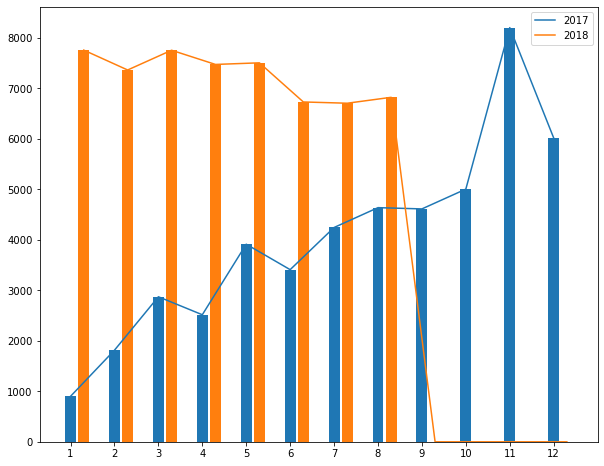

In [5]:
x_range = np.arange(len(months))
plt.figure(figsize=(10,8))
plt.plot(x_range, df_2017['cnt'], label = '2017')
plt.plot(x_range + 0.3, df_2018['cnt'], label = '2018')
plt.bar(x_range, df_2017['cnt'], width=0.25)
plt.bar(x_range + 0.3, df_2018['cnt'], width=0.25)
plt.xticks(x_range, months)
plt.legend()
plt.show()


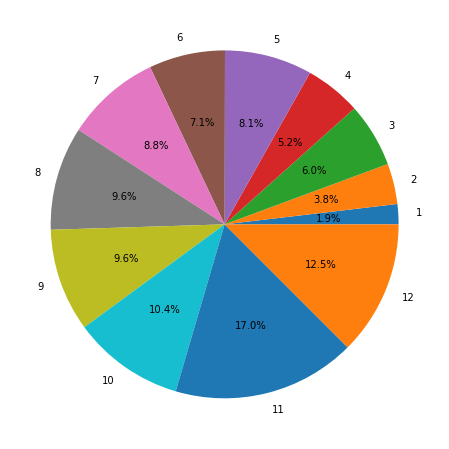

In [6]:
#2017년 파이차트 비율
plt.figure(figsize=(8,8))
plt.pie(df_2017['percent'], labels=df_2017.index, autopct='%.1f%%')
plt.show()


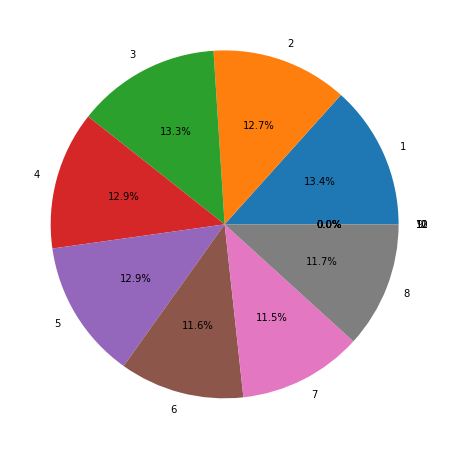

        cnt  percent
month               
1      7757    13.35
2      7363    12.67
3      7754    13.34
4      7473    12.86
5      7505    12.92
6      6730    11.58
7      6705    11.54
8      6822    11.74
9         0     0.00
10        0     0.00
11        0     0.00
12        0     0.00


In [7]:
#2018년 파이차트 비율
plt.figure(figsize=(8,8))
plt.pie(df_2018['percent'], labels=df_2018.index, autopct='%.1f%%')
plt.show()
print(df_2018)


Text(0.5, 1.0, '2017')

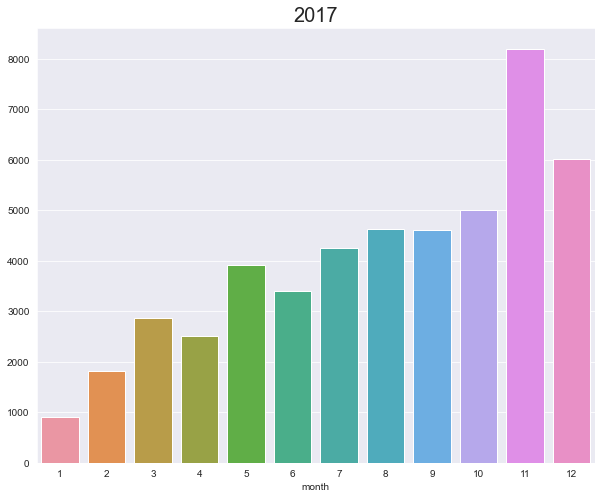

In [8]:
#2017년 배송 막대그래프
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(x=df_2017.index, y=df_2017['cnt'].values)
plt.title('2017',fontsize=20)


Text(0.5, 1.0, '2018')

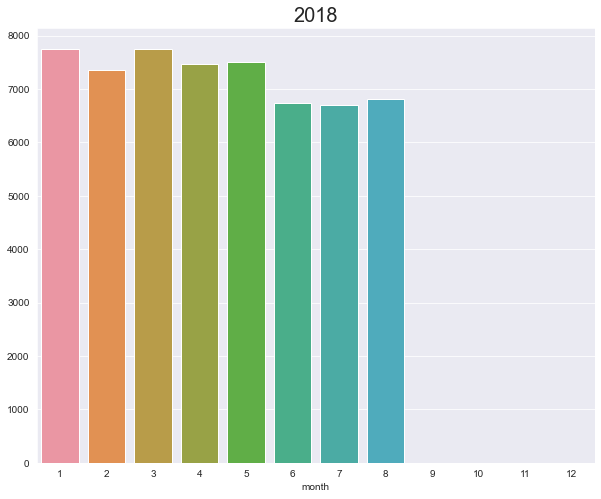

In [9]:
#2018년 배송 막대그래프
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(x=df_2018.index, y=df_2018['cnt'].values)
plt.title('2018',fontsize=20)


In [10]:
#날짜형을 to_datetime으로 변경 후 카피
finall_brazil_datasets[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] = finall_brazil_datasets[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].apply(pd.to_datetime)
df = finall_brazil_datasets.copy()

#구매날짜의 년, 월을 따로 분리
df['order_purchase_timestamp_year'] = df['order_purchase_timestamp'].dt.year
df['order_purchase_timestamp_month'] = df['order_purchase_timestamp'].dt.month


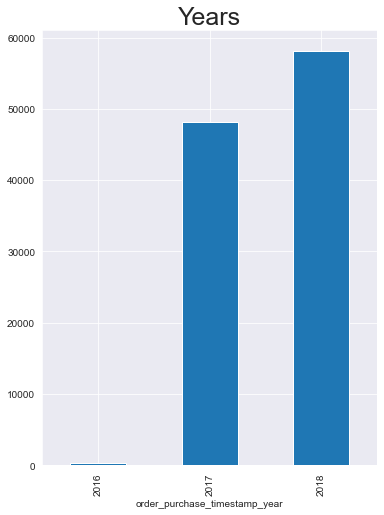

In [11]:

df.groupby('order_purchase_timestamp_year').size().plot(
    kind = 'bar',
    figsize=(6,8),  
)
plt.title('Years',fontsize=25)
# %%
a = df['order_purchase_timestamp_year'] == '2016'



In [12]:
#배송카테고리별 평균 배송시간
brazil_datasets2 = pd.read_csv('finaldf2.csv')

df2 = brazil_datasets2.groupby(['product_category_name_english']).mean()
df2.drop( 'order_item_id', axis=1, inplace=True)
df2.drop( 'customer_zip_code_prefix', axis=1, inplace=True)
df2.drop( 'seller_zip_code_prefix', axis=1, inplace=True)
df2.drop( 'seller_geolocation_lat', axis=1, inplace=True)
df2.drop( 'seller_geolocation_lng', axis=1, inplace=True)
df2.drop( 'customer_geolocation_lat', axis=1, inplace=True)
df2.drop( 'customer_geolocation_lng', axis=1, inplace=True)
print(df2.index)



Index(['agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers',
       'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden',
       'costruction_tools_tools', 'diapers_and_hygiene', 'drinks',
       'dvds_blu_ray', 'electronics', 'fashio_female_clothing',
       'fashion_bags_accessories', 'fashion_childrens_clothes',
       'fashion_male_clothing', 'fashion_shoes', 'fashion_sport',
       'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food',
       'food_drink', 'furniture_bedroom', 'furniture_decor',
       'furniture_living_room', 'furniture_mattress_and_upholstery',
       'garden_tools', 'health_beauty', 'home_applia

Text(0.5, 1.0, 'Delay')

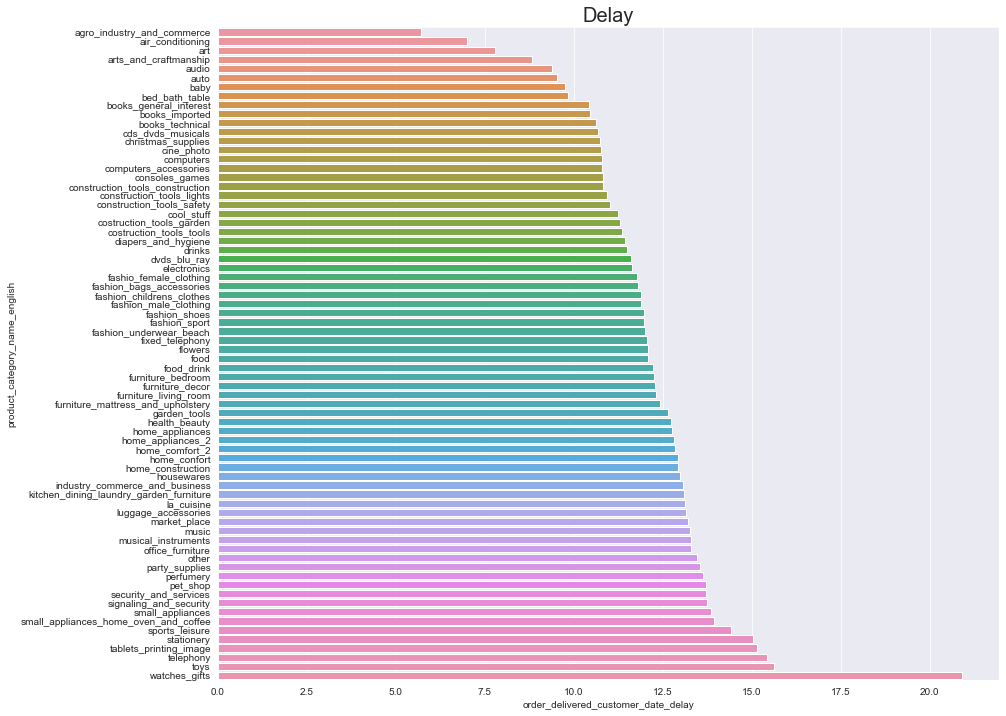

In [21]:
fig=plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
sns.barplot(y=df2.index, x=df2['order_delivered_customer_date_delay'].sort_values())
plt.title('Delay',fontsize=20)


Text(0.5, 1.0, 'weight')

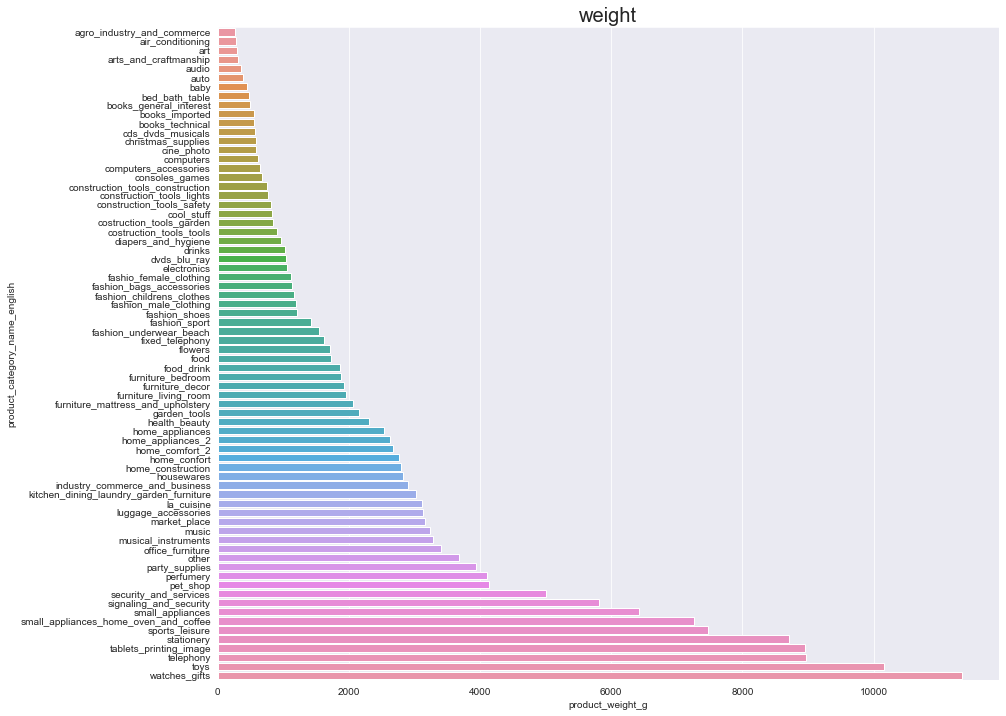

In [20]:

fig=plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
sns.barplot(y=df2.index, x=df2['product_weight_g'].sort_values())
plt.title('weight',fontsize=20)


In [26]:
#카테고리별 총수
print(brazil_datasets2.groupby(['product_category_name_english']).size())
#106556

product_category_name_english
agro_industry_and_commerce     206
air_conditioning               287
art                            191
arts_and_craftmanship           23
audio                          358
                              ... 
stationery                    2402
tablets_printing_image          81
telephony                     4320
toys                          3925
watches_gifts                 5727
Length: 72, dtype: int64


In [94]:
print(df.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category_name_english',
       'customer_zip_code_prefix', 'seller_zip_code_prefix',
       'seller_geolocation_lat', 'seller_geolocation_lng',
       'customer_geolocation_lat', 'customer_geolocation_lng',
       'order_purchase_timestamp_year', 'order_purchase_timestamp_month'],
      dtype='object')
